In [1]:
import requests
import credentials
import pandas as pd
import matplotlib.pyplot as plt

# Inputs: Stock Symbol, API Key

In [2]:
SYMBOL = 'JNJ'
API_KEY = credentials.FMP_API_KEYS

# Retrieve Historical Dividend Payout Amounts

In [3]:
div = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/{SYMBOL}?apikey={API_KEY}").json()

In [4]:
div_data = {'Date': [],
           'Dividend': []}

for h in div['historical']:
    if 'dividend' in h:
        print(h['dividend'])
        div_data['Date'].append(h['date'])
        div_data['Dividend'].append(h['dividend'])

1.06
1.06
1.01
1.01
1.01
1.01
0.95
0.95
0.95
0.95
0.9
0.9
0.9
0.9
0.84
0.84
0.84
0.84
0.8
0.8
0.8
0.8
0.75
0.75
0.75
0.75
0.7
0.7
0.7
0.7
0.66
0.66
0.66
0.66
0.61
0.61
0.61
0.61
0.57
0.57
0.57
0.57
0.54
0.54
0.54
0.54
0.49
0.49
0.49
0.49
0.46
0.46
0.46
0.46
0.415
0.415
0.415
0.415
0.375
0.375
0.375
0.375
0.33
0.33
0.33
0.33
0.285
0.285
0.285
0.285
0.24
0.24
0.24
0.24
0.205
0.205
0.205
0.205
0.18
0.18
0.18
0.36
0.32
0.32
0.32
0.32
0.28
0.28
0.28
0.28
0.25
0.25
0.25
0.25
0.22
0.22
0.22
0.22
0.19
0.19
0.19
0.38
0.33
0.33
0.33
0.33
0.29
0.29
0.29
0.29
0.26
0.26
0.26
0.26
0.23
0.23
0.23
0.46
0.4
0.4
0.4
0.4
0.34
0.34
0.34
0.34
0.29
0.03625
0.03625
0.03625
0.03125
0.03125
0.03125
0.03125
0.02625
0.02625
0.02625
0.02625
0.02188
0.02188
0.02188
0.02188
0.02031
0.02031
0.02031
0.02031
0.01875
0.01875
0.01875
0.01875
0.01719
0.01719
0.01719
0.01719
0.01563
0.01563
0.01563
0.01563
0.01375
0.01375
0.01375
0.01375
0.01198
0.01198
0.01198
0.01198
0.01042
0.01042
0.01042
0.01042
0.01042
0.00885
0.008

In [5]:
df = pd.DataFrame(div_data)
df.set_index('Date', inplace=True)
df = df[::-1]
df

,Dividend
Date,
1962-02-13,0.00058
1962-05-22,0.00058
1962-08-21,0.00058
1962-11-21,0.00058
1963-02-19,0.00081
...,...
2020-08-24,1.01000
2020-11-23,1.01000
2021-02-22,1.01000


# Parse Years to Calculate Annual Dividends

In [6]:
years = {}

for date in df.index:
    year = date.split('-')[0]
    if year in years:
        years[year] += df.loc[date, 'Dividend']
    else:
        years[year] = df.loc[date, 'Dividend']

# Historical Payout Visualization

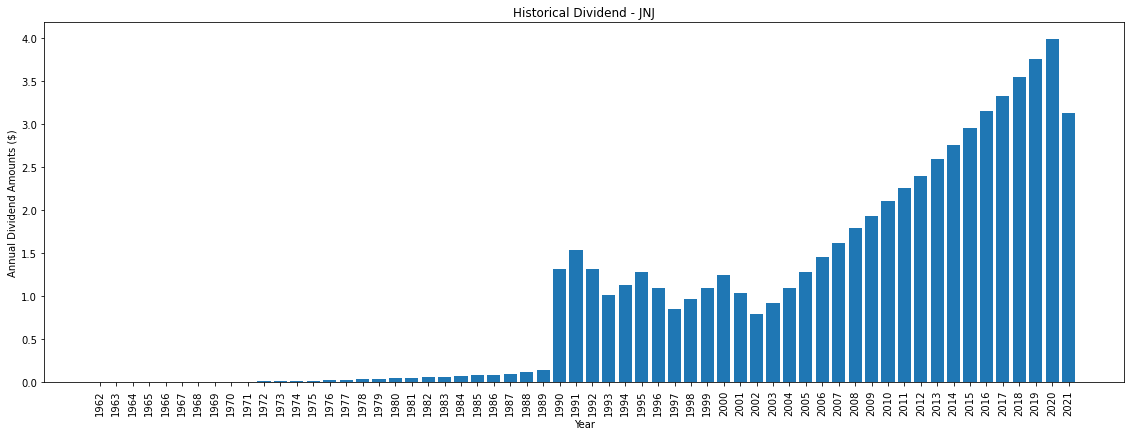

In [7]:
x_value = [i for i in years.keys()]
y_value = [i for i in years.values()]
fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_value, y_value)
plt.title('Historical Dividend - ' + SYMBOL)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Annual Dividend Amounts ($)')
plt.show()